# Gathering Data

In this part of the project, I will gather data from the following three data sources:
1. The WeRateDogs Twitter archive.  `twitter_archive_enhanced.csv`
2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. The file is on Udacity's server and I will need to use the requests.get function to extract a tsv file. `image-predictions.tsv`
3. Query the Twitter API to collect each tweet's retweet count and favorite ("like") count. 
`tweet_json.txt`

In [721]:
# load the following packages
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [722]:
# read the "WeRateDogs“ Twitter archive
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None


In [723]:
# read Tweet Image Predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
res = requests.get(url)
res.status_code

200

In [724]:
url.split('/')[-1]

'image-predictions.tsv'

In [725]:
# Make directory if it doesn't already exist
folder_name = 'tweet_image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [726]:
with open(os.path.join(folder_name,url.split('/')[-1]),mode = 'wb') as file:
    file.write(res.content)

In [727]:
predictions_df = pd.read_csv('tweet_image_predictions/image-predictions.tsv', sep='\t')
predictions_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [728]:
# Query the API

consumer_key = '***********************'
consumer_secret = '***********************'
access_token = '***********************'
access_secret = '***********************'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth,
                 wait_on_rate_limit=True,
                 wait_on_rate_limit_notify = True)

In [729]:
# Putting all archive_df's tweet IDs into a list
tweet_id = archive_df['tweet_id']
# Preview the tweet IDs. 
len(list(tweet_id))

2356

In [24]:
from timeit import default_timer as timer
count = 0
fails_dict = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for i in tweet_id:
        count += 1
        print(str(count) + ": " + str(i))
        try:
            tweet = api.get_status(i, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[i] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


#tweet_status = api.get_status(tweet_id[0], tweet_mode = 'extended')
#tweet_status

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Rate limit reached. Sleeping for: 196


Success
899: 758854675097526272
Success
900: 758828659922702336
Success
901: 758740312047005698
Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success


Rate limit reached. Sleeping for: 710


Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
18

In [730]:
df_list = []

with open('tweet_json.txt','r') as json_file:
    for line in json_file:
        json_data =  json.loads(line)
        df_list.append({
            'tweet_id': json_data['id'],
            'favorites': json_data['favorite_count'],
            'retweet': json_data['retweet_count'],
            'timestamp': json_data['created_at']})
tweet_json_data = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweet','timestamp'])

In [731]:
tweet_json_data.head(3)

,tweet_id,favorites,retweet,timestamp
0,892420643555336193,35705,7548,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,30873,5593,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,23208,3704,Mon Jul 31 00:18:03 +0000 2017


# Assessing Data

In this section, I am going to assess data visually and programmatically for quality and tidiness.

### Quality Issues:


1. `archive_df` table: Not all records are original tweets. There are 181 retweets and 78 replies but we only want original ratings (not retweets or replies). 
2. `archive_df` table: Not all records have images. Only 2,297 records have images (see the "expanded_url" column), meaning that 59 records do not have images. We only want tweets with images according to project requirements.
3. `archive_df` table: Messy data types. timestamp is a string when it should be datetime. tweet id should be a string instead of int64.
4. `archive_df` table: there are 745 "None" values in the name column. Further, some name values are errors in the name column (e.g. "a").
5. `archive_df` table: ratings do not look accurate. Some rating numerator does not look normal at 1,776. Further, denominator should be 10 but we also find values like 170 and 150.
6. `archive_df` table: floofer has different ways of spelling in the tweet text. (e.g. "floofiest", & "Floofer"). The slightly different spelling like"floofiest" and "Floofer"were not picked up or categorized as "floofer". I need to correct this. Same story with the otherr three dog stages!
7. `archive_df` table: the source column's values are long text strings and can be shortened to "TweetDeck" from \<a> href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck<\/a>
8. `predictions_df` table: some tweets' predictions do not belong to breeds of dogs. If the three predictions (p1, p2, p3) are all false, we will need to drop these rows.


### Tidiness Issues:
1. `archive_df` table: doggo, floofer, pupper, puppo represent one variable -- dog stages and the fact that they are now split out into individual columns does not follow the tidy data rule.
2. `tweet_json_data` table: favorites and retweets from the `tweet_json_data` table should be part of the `archive_df` table and they can be merged together.
3. `archive_df` table: The replies columns and the retweets columns can be dropped because they all contain only NA values.
4. `predictions_df` table: predictions about dog breeds should be merged into the `archive_df` table as well.

First of all, I need to create copies of the "dirty" datasets.

In [732]:
archive_clean = archive_df.copy()

In [733]:
archive_df[archive_df.name.str.contains(r'^[a-z]+', regex = True)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1,https://twitter.com/dog_rates/status/828650029636317184/photo/1",14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024703037440/photo/1,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,NaN,NaN,NaN,"https://twitter.com/dog

In [734]:
predictions_clean = predictions_df.copy()

In [735]:
json_clean = tweet_json_data.copy()

In [736]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [737]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [738]:
json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2331 non-null   int64 
 1   favorites  2331 non-null   int64 
 2   retweet    2331 non-null   int64 
 3   timestamp  2331 non-null   object
dtypes: int64(3), object(1)
memory usage: 73.0+ KB


In [739]:
archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
398,825026590719483904,NaN,NaN,2017-01-27 17:04:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Pablo. He's one gorgeous puppo. A true 12/10. Click the link to see why Pablo requests your assistance\n\nhttps://t.co/koHvVQp9bL https://t.co/IhW0JKf7kc,NaN,NaN,NaN,"https://www.gofundme.com/my-puppys-double-cataract-surgery,https://twitter.com/dog_rates/status/825026590719483904/photo/1,https://twitter.com/dog_rates/status/825026590719483904/photo/1",12,10,Pablo,None,None,None,puppo
321,834209720923721728,NaN,NaN,2017-02-22 01:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wilson. He's aware that he has something on his face. Waiting for you to get it for him. 12/10 https://t.co/FaeinVjzTZ,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/834209720923721728/photo/1,https://twitter.com/dog_rates/status/834209720923721728/photo/1",12,10,Wilson,None,None,None,None
1383,700847567345688576,NaN,NaN,2016-02-20 01:00:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Crouton. He's a Galapagos Boonwiddle. Has a legendary tongue (most Boonwiddles do). Excellent stuff 10/10 https://t.co/110Eeg7KW3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700847567345688576/photo/1,10,10,Crouton,None,None,None,None
1841,675878199931371520,NaN,NaN,2015-12-13 03:21:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Ok, I'll admit this is a pretty adorable bunny hopping towards the ocean but please only send in dogs... 11/10 https://t.co/sfsVCGIipI",NaN,NaN,NaN,https://twitter.com/dog_rates/status/675878199931371520/photo/1,11,10,None,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [740]:
predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1071,716439118184652801,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,1,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
232,670417414769758208,https://pbs.twimg.com/media/CU3NE8EWUAEVdPD.jpg,1,sea_urchin,0.493257,False,porcupine,0.460565,False,cardoon,0.008146,False
538,676949632774234114,https://pbs.twimg.com/media/CWUCGMtWEAAjXnS.jpg,1,Welsh_springer_spaniel,0.206479,True,Saint_Bernard,0.139339,True,boxer,0.114606,True
101,667793409583771648,https://pbs.twimg.com/media/CUR6jqVWsAEgGot.jpg,1,dalmatian,0.535073,True,English_setter,0.451219,True,Great_Dane,0.008164,True
1472,779834332596887552,https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg,1,golden_retriever,0.993830,True,cocker_spaniel,0.003143,True,Great_Pyrenees,0.000917,True


In [741]:
json_clean.sample(5)

,tweet_id,favorites,retweet,timestamp
24,887101392804085760,28380,5346,Tue Jul 18 00:07:08 +0000 2017
1286,707038192327901184,2147,766,Tue Mar 08 03:00:15 +0000 2016
2164,668967877119254528,136,21,Tue Nov 24 01:42:25 +0000 2015
520,806629075125202948,75092,34774,Wed Dec 07 22:38:52 +0000 2016
2309,666293911632134144,459,313,Mon Nov 16 16:37:02 +0000 2015


I want to tackle the messy data type issue first because it will affect merging tables. 

In [742]:
# tweet ids should be strings instead integers.
predictions_clean.tweet_id = predictions_clean.tweet_id.astype(str)
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
json_clean.tweet_id = json_clean.tweet_id.astype(str)

In [743]:

# timestamp should be datetime instead of strings.
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)
json_clean.timestamp = pd.to_datetime(json_clean.timestamp)

Next, I want to see if there are any duplicated rows that I need to get rid of. Looks like the output of the three tables are all 0s, meaning that there are no duplicated values.

In [744]:
sum(archive_clean.duplicated()), sum(predictions_clean.duplicated()), sum(json_clean.duplicated())

(0, 0, 0)

Further, I want to have a pulse on the rating columns (the max, the min, whether abnormal values exist). I will do so by using the describe function. It looks like the minimum value of 0 are not correct (I would assume this account won't rate any dogs 0 because it will offend the dog owners). Additionally, the maximum rating numerator of 1,776 also looks too high. 

In [745]:
archive_clean[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [746]:
archive_clean.rating_numerator.value_counts().sort_index(ascending = False)

1776    1  
960     1  
666     1  
420     2  
204     1  
182     1  
165     1  
144     1  
143     1  
121     1  
99      1  
88      1  
84      1  
80      1  
75      2  
60      1  
50      1  
45      1  
44      1  
27      1  
26      1  
24      1  
20      1  
17      1  
15      2  
14      54 
13      351
12      558
11      464
10      461
9       158
8       102
7       55 
6       32 
5       37 
4       17 
3       19 
2       9  
1       9  
0       2  
Name: rating_numerator, dtype: int64

In [747]:
archive_clean.rating_denominator.value_counts().sort_index(ascending = False)

170    1   
150    1   
130    1   
120    1   
110    1   
90     1   
80     2   
70     1   
50     3   
40     1   
20     2   
16     1   
15     1   
11     3   
10     2333
7      1   
2      1   
0      1   
Name: rating_denominator, dtype: int64

Next, after sampling five rows from the archive_clean table, I noticed that the source column's values are very long text strings with unnecessary information that makes the tables hard to read. We can potentially shorten those text strings.

In [748]:
archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

Last but not the least, the name column contains values like "None" and "a". 
* For "None", because there are 745 rows, it is not realistic for me to go into each tweet and examine whether dog names actually appeared or not in the tweet text.
* For values like "a", it is obvious that nobody will name his/her dog "a", so I will replace those lowercase names with "None"

In [749]:
archive_clean.name.value_counts()

None       745
a          55 
Charlie    12 
Oliver     11 
Cooper     11 
           .. 
Theo       1  
Acro       1  
Pluto      1  
Margo      1  
Butters    1  
Name: name, Length: 957, dtype: int64

### Quality issue #1

Not all records are original tweets. There are 181 retweets and 78 replies but we only want original ratings (not retweets or replies).

**Define**:
* There are 181 retweets. Based on project requirements, we only want original ratings instead of retweets. 
* we are going to drop these 181 retweets.

**Code:**

In [750]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isna()]
# in order to calculate the number of rows I dropped due to replies, I added the following code.
archive_clean_after_dropping_rt = archive_clean.copy()

**Test:**

In [751]:
print('I have dropped {} rows as they are retweets'.format(archive_df.tweet_id.shape[0]-archive_clean.tweet_id.shape[0]))


I have dropped 181 rows as they are retweets


**Define**:
* There are 78 replies. Based on project requirements, we only want original ratings instead of replies. 
* we are going to drop these 78 replies.

**Code:**

In [752]:
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isna()]

In [753]:
archive_clean[archive_clean.in_reply_to_status_id.isna()].shape[0]

2097

**Test:**

In [754]:
print('I have dropped {} rows as they are replies'.format(archive_clean_after_dropping_rt.tweet_id.shape[0]-archive_clean.tweet_id.shape[0]))


I have dropped 78 rows as they are replies


In [755]:
archive_clean.info()
# as seen below, retweet and reply rows are gone. 
# in_reply_to_status_id --> 0
# retweeted_status_id --> 0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

### Quality issue #2

Not all records have images. Only 2,297 records have images (see the "expanded_url" column), meaning that 59 records do not have images. We only want tweets with images according to project requirements.

**Define**:
* We only want original ratings that have images
* Need to remove the rows with NA expanded_urls
* before removing those rows, I want to see if any of those tweet IDs without expanded urls in the archive_clean table have any jpg_url in the predictions_clean table. If the output is 0, I will then remove the NA expanded urls rows completely from the archive_clean table.

**Code:**

In [756]:
any_urls = pd.merge(archive_clean[archive_clean.expanded_urls.isnull()], predictions_clean, how = 'left', \
                        left_on = ['tweet_id'],\
                        right_on = ['tweet_id'])
any_urls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    3 non-null      object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   3 non-null      datetime64[ns, UTC]
 4   source                      3 non-null      object             
 5   text                        3 non-null      object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               0 non-null      object             
 10  rating_numerator            3 non-null      int64              
 1

As you can see from above, jpg_url is showing 0. That means we can't find any matches. Now I will need to drop the expanded url = NA rows.

In [757]:
archive_clean = archive_clean[archive_clean.expanded_urls.notnull()]

**Test:**

In [758]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2094 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2094 non-null   datetime64[ns, UTC]
 4   source                      2094 non-null   object             
 5   text                        2094 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2094 non-null   int64           

### Quality issue #3

tweet id should be a string instead of int64.

**Define**:
* tweet id's type should be string instead of integer.
* timestamp's type should be datetime instead of string!

**Code**: This issue was already tackled in the cells in the beginning of this report. For your reference, I pasted the codes here.
#### tweet ids should be strings instead integers.
* predictions_clean.tweet_id = predictions_clean.tweet_id.astype(str)
* archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
* json_clean.tweet_id = json_clean.tweet_id.astype(str)

#### timestamp should be datetime instead of strings.
* archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)
* json_clean.timestamp = pd.to_datetime(json_clean.timestamp)

**Test**:

In [759]:
type(predictions_clean.tweet_id[0]), type(archive_clean.tweet_id[0]), type(json_clean.tweet_id[0])

(str, str, str)

In [760]:
type(archive_clean.timestamp[0]), type(json_clean.timestamp[0])

(pandas._libs.tslibs.timestamps.Timestamp,
 pandas._libs.tslibs.timestamps.Timestamp)

### Quality issue #4

Some name values are errors in the name column (e.g. "a").

**Define**:
* Dog names look abnormal. 
* Need to change these irregular names to "none" so that our dog name analysis is not biased.

**Code**:

In [761]:
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

# Dog names usually start with an uppercase character.
# However, I found the following values (e.g. "a", "the", "an") in the "name" column.
# Because there are more than 100 rows, checking line by line would be very inefficient.
# As a result, I will change the following values to "none".
none_name = archive_clean.name.str.contains(r'^[a-z]+', regex = True)
archive_clean.loc[none_name, 'name'] = 'None'
archive_clean.name.value_counts()


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



None       704
Lucy       11 
Charlie    11 
Cooper     10 
Oliver     10 
           .. 
Eugene     1  
Julio      1  
Lilli      1  
Pilot      1  
Butters    1  
Name: name, Length: 930, dtype: int64

**Test**:

In [763]:
archive_clean[none_name].name.value_counts()
# all the irregular values are changed to "None" successfully

None    104
Name: name, dtype: int64

### Quality issue #5

Ratings do not look accurate. Some rating numerator does not look normal at 1,776. Further, denominator should be 10 but we also find values like 170 and 150. After further investigation, it seems denominators like 100 are for multiple dogs. For example, if a picture has 10 dogs, WeRateDogs would just use 100 as the denominator. In this case, we will need to translate values like 165/150 to 11/10. 


**Define:**
* Extract ratings from tweet text to see if that rating matches "rating_numerator" and "rating_denominator".
* If not, we will need to correct that value.

**Code:**

In [764]:
archive_clean_copy = archive_clean.copy()
archive_clean_copy['ratings'] = archive_clean_copy.text.str.extract(r'(\d{1,2}(?:\.\d{1,2}?)?)\/\d{1,2}').astype(float)
archive_clean_copy[archive_clean_copy.rating_numerator != archive_clean_copy.ratings][['tweet_id','text','rating_numerator','rating_denominator','ratings']]

,tweet_id,text,rating_numerator,rating_denominator,ratings
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10,13.50
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10,9.75
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10,11.27
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,65.00
979,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10,76.00
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,4.00
1635,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110,21.00
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10,11.26
1779,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144,120,44.00
2074,670842764863651840,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,420,10,20.00


In [765]:
#First of all, I will drop the following two tweets.
#* 670842764863651840: Not a dog rating
#* 749981277374128128: rated as 1776 because of independence day
biased_rating_list = ['670842764863651840','749981277374128128']
archive_clean_copy = archive_clean_copy[~archive_clean_copy.tweet_id.isin(biased_rating_list)]

# Second, some ratings were not picked up correctly because of the decimals. We will just replace "rating_numerator" with "ratings"
archive_clean_copy
decimal_list = ['883482846933004288','786709082849828864','778027034220126208','680494726643068929']
decimal_mask = archive_clean_copy.tweet_id.isin(decimal_list)
archive_clean_copy.loc[decimal_mask, 'rating_numerator'] = archive_clean_copy.ratings


In [766]:
archive_clean_copy[archive_clean_copy.rating_denominator>10][['tweet_id','text','rating_numerator','rating_denominator','ratings']]

,tweet_id,text,rating_numerator,rating_denominator,ratings
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70,84.0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150,65.0
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11,9.0
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170,4.0
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20,4.0
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50,50.0
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90,99.0
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80,80.0
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50,45.0
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50,60.0


In [767]:
# next, some denominators and numerators are really high because they are for multiple dogs. 
# For those entries, we need to convert fractions to floats (eg. 84/70 -> 12/10)
archive_clean_copy['real_ratings'] = archive_clean_copy['rating_numerator']/archive_clean_copy['rating_denominator']*10
# the following three tweets have multiple fractions in the tweet text and we will need to deal with them later. Thus excluded from this step.
listies = ['740373189193256964','722974582966214656','682962037429899265']
decimal_maskies = (archive_clean_copy.rating_denominator>10)&(~archive_clean_copy.tweet_id.isin(listies))
archive_clean_copy.loc[decimal_maskies, 'rating_numerator'] = archive_clean_copy.real_ratings
#archive_clean_copy.rating_numerator.value_counts()
archive_clean_copy[decimal_maskies][['tweet_id','text','rating_numerator','rating_denominator','ratings','real_ratings']]

,tweet_id,text,rating_numerator,rating_denominator,ratings,real_ratings
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,12.0,70,84.0,12.0
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,11.0,150,65.0,11.0
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,12.0,170,4.0,12.0
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,10.0,50,50.0,10.0
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,11.0,90,99.0,11.0
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,10.0,80,80.0,10.0
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",9.0,50,45.0,9.0
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,12.0,50,60.0,12.0
1433,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,11.0,40,44.0,11.0
1635,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,11.0,110,21.0,11.0


In [768]:
# Further, some numerators are too low < 4 (usually the account would rate dogs to be higher than 10)
# I want to double check the entries just to be safe
archive_clean_copy[archive_clean_copy.rating_numerator<=4][['tweet_id','text','rating_numerator','rating_denominator','ratings','real_ratings']]

,tweet_id,text,rating_numerator,rating_denominator,ratings,real_ratings
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0.0,10,0.0,0.0
765,777885040357281792,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,3.0,10,3.0,3.0
883,760252756032651264,This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,4.0,10,4.0,4.0
912,757596066325864448,Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl,4.0,10,4.0,4.0
1004,747816857231626240,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,4.0,10,4.0,4.0
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20,4.0,2.0
1189,718246886998687744,This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,3.0,10,3.0,3.0
1219,714631576617938945,This is Benedict. He's a feisty pup. Needs a brushing. Portable af. Looks very angry actually. 4/10 might not pet https://t.co/3oeFfHjv0Z,4.0,10,4.0,4.0
1249,711306686208872448,What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,3.0,10,3.0,3.0
1303,707420581654872064,This is Keurig. He's a rare dog. Laughs like an idiot tho. Head is basically a weapon. Poorly maintained goatee 4/10 https://t.co/xOrUyj7K30,4.0,10,4.0,4.0


In [769]:
# By examining the rows above, it is obvious that we need to correct the following values.
#722974582966214656: should be 13/10
#695064344191721472: should be 13/10
#666287406224695296: should be 9/10

decimal_mask_a = archive_clean_copy.tweet_id == '722974582966214656'
archive_clean_copy.loc[decimal_mask_a, 'rating_numerator'] = 13
decimal_mask_b = archive_clean_copy.tweet_id == '695064344191721472'
archive_clean_copy.loc[decimal_mask_b, 'rating_numerator'] = 13
decimal_mask_c = archive_clean_copy.tweet_id == '666287406224695296'
archive_clean_copy.loc[decimal_mask_c, 'rating_numerator'] = 9

In [770]:
#Remember we mentioned multiple fractions appeared in text above? 
# Now it's the time to fix that.
archive_clean_copy.query('tweet_id == "740373189193256964" |tweet_id == "682962037429899265" |tweet_id == "722974582966214656" ')
decimal_mask_d = archive_clean_copy.tweet_id == '740373189193256964'
archive_clean_copy.loc[decimal_mask_d, 'rating_numerator'] = 14
decimal_mask_e = archive_clean_copy.tweet_id == '722974582966214656'
archive_clean_copy.loc[decimal_mask_e, 'rating_numerator'] = 13
decimal_mask_f = archive_clean_copy.tweet_id == '682962037429899265'
archive_clean_copy.loc[decimal_mask_f, 'rating_numerator'] = 10

In [771]:
# check if we have fixed everything
# the 716439118184652801 tweet still looks incorrect.
archive_clean_copy[archive_clean_copy.rating_denominator>10][['tweet_id','text','rating_numerator','rating_denominator','ratings','real_ratings']]

,tweet_id,text,rating_numerator,rating_denominator,ratings,real_ratings
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,12.0,70,84.0,12.000000
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,11.0,150,65.0,11.000000
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",14.0,11,9.0,8.181818
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,12.0,170,4.0,12.000000
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,13.0,20,4.0,2.000000
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,10.0,50,50.0,10.000000
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,11.0,90,99.0,11.000000
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,10.0,80,80.0,10.000000
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",9.0,50,45.0,9.000000
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,12.0,50,60.0,12.000000


In [772]:
decimal_mask_g = archive_clean_copy.tweet_id == '716439118184652801'
archive_clean_copy.loc[decimal_mask_g, 'rating_numerator'] = 11

In [773]:
archive_clean_copy.rating_numerator.value_counts()
# 24 does not look correct. I might need to drop the row after reviewing.

12.00    489
10.00    436
11.00    419
13.00    289
9.00     154
8.00     98 
7.00     51 
14.00    39 
5.00     33 
6.00     32 
3.00     19 
4.00     14 
2.00     9  
1.00     4  
11.27    1  
24.00    1  
0.00     1  
13.50    1  
11.26    1  
9.75     1  
Name: rating_numerator, dtype: int64

In [774]:
# 
archive_clean_copy[archive_clean_copy.rating_numerator>20][['tweet_id','text','rating_numerator','rating_denominator','ratings','real_ratings']]


,tweet_id,text,rating_numerator,rating_denominator,ratings,real_ratings
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7,24.0,34.285714


In [775]:
archive_clean_copy = archive_clean_copy[~(archive_clean_copy.tweet_id=='810984652412424192')]

In [776]:
archive_clean_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2091 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2091 non-null   datetime64[ns, UTC]
 4   source                      2091 non-null   object             
 5   text                        2091 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2091 non-null   object             
 10  rating_numerator            2091 non-null   float64         

now that all the rating denominators are set to 10, the rating denominator column can be removed.

In [777]:
archive_clean_copy = archive_clean_copy.drop(['rating_denominator','real_ratings','ratings'],axis=1)

**Test**:

In [778]:
archive_clean_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2091 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2091 non-null   datetime64[ns, UTC]
 4   source                      2091 non-null   object             
 5   text                        2091 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2091 non-null   object             
 10  rating_numerator            2091 non-null   float64         

After performing the data cleaning tactics above, I will spot check some rows to see if the rating_numerator is correct, especially the ones with rating_denominator <> 10.

In [779]:
archive_clean_copy[archive_clean_copy.rating_denominator !=10][['tweet_id','text','rating_numerator','rating_denominator','ratings','real_ratings']]

AttributeError: 'DataFrame' object has no attribute 'rating_denominator'

In [780]:
archive_clean = archive_clean_copy

### Quality issue #6

**Define:**

*floofer*
* floofer has different ways of spelling in the tweet text. (e.g. floofer, floofiest, Floofer)
* tweet text containing "floofer", "floofiest", & "Floofer" were not categorized as "floofer" in the "floofer" column
* we need to correct this


*pupper*
* pupper also has different ways of spelling in tweet text. (e.g. "Pupperdoop", "puppers")
* tweet text containing "Pupperdoop"& "puppers" were not categorized as "pupper" in the "pupper" column
* we need to correct this

*puppo*
* puppo also has different ways of spelling in tweet text
* tweet text containing "Puppo" was not categorized as "puppo" in the "puppo" column
* we need to correct this

*doggo*
* doggo also has different ways of spelling in tweet text (e.g. doggos)
* tweet text containing "doggos" was not categorized as "doggo" in the "doggo" column
* we need to correct this


In [781]:
archive_clean.floofer.value_counts()

None       2081
floofer    10  
Name: floofer, dtype: int64

In [782]:
archive_clean.doggo.value_counts()

None     2008
doggo    83  
Name: doggo, dtype: int64

In [783]:
archive_clean.puppo.value_counts()

None     2067
puppo    24  
Name: puppo, dtype: int64

In [784]:
archive_clean.pupper.value_counts()

None      1862
pupper    229 
Name: pupper, dtype: int64

**Code & Test (floofer):**

In [785]:
floofer_mask = (archive_clean.floofer == "None") & \
               (archive_clean.text.str.contains(r'[Ff][Ll][Oo][Oo][Ff]+', regex = True))
archive_clean[floofer_mask].head(3)[['text','floofer']]
# As shown below, inside the tweet text -- "The floofs have been released I repeat 
# the floofs have been released. 84/70 https://t.co/NIYC820tmd", there is "floofs", 
# but that's not categorized as "floofer".

,text,floofer
25,This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,None
53,This is Rey. He's a Benebop Cumberfloof. 12/10 dangerously pettable https://t.co/503CgWbhxQ,None
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,None


In [786]:
archive_clean.loc[floofer_mask, 'floofer'] = "floofer"

In [787]:
archive_clean[archive_clean.text.str.contains(r'[Ff][Ll][Oo][Oo][Ff]+', regex = True)].floofer.value_counts()

floofer    39
Name: floofer, dtype: int64

**Code & Test (pupper):**

In [788]:
pupper_mask = (archive_clean.pupper == "None") & \
               (archive_clean.text.str.contains(r'[Pp][Uu][Pp][Pp][Ee][Rr]+', regex = True))
archive_clean[pupper_mask][['text','pupper']].tail(3)


,text,pupper
1900,This is Rodman. He's getting destroyed by the surfs. Valiant effort though. 10/10 better than most puppers probably https://t.co/S8wCLemrNb,None
1928,Herd of wild dogs here. Not sure what they're trying to do. No real goals in life. 3/10 find your purpose puppers https://t.co/t5ih0VrK02,None
2141,This is Zoey. Her dreams of becoming a hippo ballerina don't look promising. 9/10 it'll be ok puppers https://t.co/kR1fqy4NKK,None


In [789]:
archive_clean.loc[pupper_mask, 'pupper'] = "pupper"

In [790]:
archive_clean[archive_clean.text.str.contains(r'[Pp][Uu][Pp][Pp][Ee][Rr]+', regex = True)].pupper.value_counts()

pupper    254
Name: pupper, dtype: int64

In [791]:
archive_clean[archive_clean.text.str.contains(r'[Pp][Uu][Pp][Pp][Ee][Rr]+', regex = True)][['text','pupper']].sample(5)

,text,pupper
1516,This golden is happy to refute the soft mouth egg test. Not a fan of sweeping generalizations. 11/10 #notallpuppers https://t.co/DgXYBDMM3E,pupper
996,SWIM AWAY PUPPER SWIM AWAY 13/10 #BarkWeek https://t.co/QGGhZoTcwy,pupper
515,This is Craig. That's actually a normal sized fence he's stuck on. H*ckin massive pupper. 11/10 someone help him https://t.co/aAUXzoxaBy,pupper
1360,Happy Friday here's a sleepy pupper 12/10 https://t.co/eBcqv9SPkY,pupper
444,Some happy pupper news to share. 10/10 for everyone involved \nhttps://t.co/MefMAZX2uv,pupper


**Code & Test (puppo):**

In [792]:
puppo_mask = (archive_clean.puppo == "None") & \
             (archive_clean.text.str.contains(r'[Pp][Uu][Pp][Pp][Oo]+', regex = True))
#archive_clean[puppo_mask][['text','puppo']]
archive_clean.loc[puppo_mask, 'puppo'] = 'puppo'


In [793]:
archive_clean[archive_clean.text.str.contains(r'[Pp][Uu][Pp][Pp][Oo]+', regex = True)].puppo.value_counts()

puppo    30
Name: puppo, dtype: int64

**Code & Test (doggo):**

In [794]:
doggo_mask = (archive_clean.doggo == "None") & \
             (archive_clean.text.str.contains(r'[Dd][Oo][Gg][Gg][Oo]+', regex = True))
archive_clean[doggo_mask][['text','doggo']]
archive_clean.loc[doggo_mask, 'doggo'] = 'doggo'


In [795]:
archive_clean[archive_clean.text.str.contains(r'[Dd][Oo][Gg][Gg][Oo]+', regex = True)].doggo.value_counts()

doggo    91
Name: doggo, dtype: int64

### Quality issue #7
the source column's values are long text strings and can be shortened to something like "TweetDeck" from https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>

**Define:**
* "source" column's values are really messy and difficult to read with the opening & closing tags
* I am going to translate those long strings to succinct information

**Code:**

In [796]:
archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1960
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     30  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    10  
Name: source, dtype: int64

In [797]:
# Mapping from full state name to abbreviation
source_abbrev = {'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>': 'Twitter for iPhone',
                '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>': 'Vine - Make a Scene',
                '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>': 'Twitter Web Client',
                '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>': 'Tweetdeck'}

# Function to apply
def abbreviate_source(archive_clean):
    if archive_clean['source'] in source_abbrev.keys():
        abbrev = source_abbrev[archive_clean['source']]
        return abbrev
    else:
        return archive_clean['source']
    
archive_clean['source'] = archive_clean.apply(abbreviate_source, axis=1)


**Test:**

In [798]:
archive_clean.source.value_counts()
# Looks like value_counts() are consistent with value_counts prior to adjustments.
# Test success!

Twitter for iPhone     1960
Vine - Make a Scene    91  
Twitter Web Client     30  
Tweetdeck              10  
Name: source, dtype: int64

### Quality issue #8
Details can be found in the Tidiness issue #4 section.

### Tidiness issue #1

#### Define

* doggo, floofer, pupper, puppo represent one variable, dog stages, and they should be inside one single column.
* The fact that they are now split out into individual columns does not follow the tidy data rule.

#### Code:

In [799]:
list(archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [800]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2091 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2091 non-null   datetime64[ns, UTC]
 4   source                      2091 non-null   object             
 5   text                        2091 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2091 non-null   object             
 10  rating_numerator            2091 non-null   float64         

In [801]:
archive_clean_combined = pd.melt(archive_clean, 
                           id_vars=['tweet_id',
                                     'in_reply_to_status_id',
                                     'in_reply_to_user_id',
                                     'timestamp',
                                     'source',
                                     'text',
                                     'retweeted_status_id',
                                     'retweeted_status_user_id',
                                     'retweeted_status_timestamp',
                                     'expanded_urls',
                                     'rating_numerator',
                                     'name'],
                            var_name = "dog_stage_column_name",
                            value_vars = ['doggo', 'floofer', 'pupper', 'puppo'],
                            value_name = 'dog_stage_value_name')

In [802]:
# This tweet 883482846933004288's dog stage is a none value and I want to see how it shows up in the new dataframe.
archive_clean_combined.query('tweet_id == "883482846933004288"')[['tweet_id','text','dog_stage_column_name','dog_stage_value_name']]
# after running the query, it seems like one row is split out into four different rows and created three duplicated rows that can be dropped.

,tweet_id,text,dog_stage_column_name,dog_stage_value_name
41,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",doggo,None
2132,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",floofer,None
4223,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",pupper,None
6314,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",puppo,None


In [803]:
# drop the three duplicated rows. Now four rows become 1 row.
stage_none = archive_clean_combined.drop_duplicates(subset=['tweet_id', 'dog_stage_value_name'])
stage_none.query('tweet_id ==  "883482846933004288"')[['tweet_id','text','dog_stage_column_name','dog_stage_value_name']]

,tweet_id,text,dog_stage_column_name,dog_stage_value_name
41,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",doggo,None


In [804]:
# inside the stage_none dataframe, if we shift our focus to tweets with specific dog stages, they still have multiple rows.
stage_none.query('tweet_id ==  "778027034220126208"')[['tweet_id','text','dog_stage_column_name','dog_stage_value_name']]

# I will create a separate dataframe with dog_stage_column_name == dog_stage_value_name. 

,tweet_id,text,dog_stage_column_name,dog_stage_value_name
583,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,doggo,None
4765,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,pupper,pupper


In [805]:
#archive_clean[archive_clean['tweet_id'].duplicated(keep=False)]
#(['tweet_id] == "778027034220126208"')

In [806]:
# stage_mask will help us identify rows that fall into the puppo, pupper, fluffer, and doggo categories.
stage_mask = archive_clean_combined.dog_stage_column_name == archive_clean_combined.dog_stage_value_name
stage_four = archive_clean_combined[stage_mask]
stage_four[['text','dog_stage_column_name','dog_stage_value_name','tweet_id']].query('tweet_id == "778027034220126208"')

,text,dog_stage_column_name,dog_stage_value_name,tweet_id
4765,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,pupper,pupper,778027034220126208


In [807]:
drop_tweet = stage_four.tweet_id.unique().tolist()
drop_tweet[:5]

['890240255349198849',
 '884162670584377345',
 '876537666061221889',
 '872967104147763200',
 '871515927908634625']

In [808]:
#stage_none.query('tweet_id ==  "890240255349198849"')[['tweet_id','text','dog_stage_column_name','dog_stage_value_name']]
stage_none = stage_none[~stage_none.tweet_id.isin(drop_tweet)]

In [809]:
stage_none[~stage_none.tweet_id.isin(drop_tweet)].query('tweet_id == "778027034220126208"')
#stage_none = stage_none[~stage_none.tweet_id.isin(drop_tweet)].query('')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,name,dog_stage_column_name,dog_stage_value_name


In [810]:
#stage_none[~stage_mask].query('tweet_id == "778027034220126208"')
stage_none = stage_none[~stage_mask]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [811]:
stage_none.query('tweet_id ==  "778027034220126208"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,name,dog_stage_column_name,dog_stage_value_name


In [812]:
archive_clean_combined_new  =pd.concat([stage_four,stage_none],ignore_index=True)

In [813]:
archive_clean_combined_new.query('tweet_id ==  "778027034220126208"')
#archive_clean_combined_new[archive_clean_combined_new.duplicated(subset = 'tweet_id', keep =  False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,name,dog_stage_column_name,dog_stage_value_name
169,778027034220126208,NaN,NaN,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,11.27,Sophie,pupper,pupper


There are 2105 rows, which are different from our original 2091 rows. Why the additional 14 rows??

In [814]:
archive_clean_combined_new[archive_clean_combined_new['tweet_id'].duplicated(keep=False)][['tweet_id','text','dog_stage_column_name','dog_stage_column_name']].shape[0]

28

After running the queries above, it is apparent that some tweet text have two types of dog stages associated with it. 
For example, "Here's a **puppo** participating in the #ScienceMarch. Cleverly disguising her own **doggo** agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel" is both a puppo and a doggo.


In [815]:
archive_clean_combined_new = archive_clean_combined_new.drop('dog_stage_column_name',axis=1)

#### Test:

In [816]:
archive_clean_combined_new.dog_stage_value_name.value_counts()
# The value count for each of the four dog stages conforms to our output below.

None       1691
pupper     254 
doggo      91  
floofer    39  
puppo      30  
Name: dog_stage_value_name, dtype: int64

In [817]:
dog_type_newer = ['pupper','doggo','floofer','puppo']
for i in dog_type_newer:
    print(archive_clean[i].value_counts())

None      1837
pupper    254 
Name: pupper, dtype: int64
None     2000
doggo    91  
Name: doggo, dtype: int64
None       2052
floofer    39  
Name: floofer, dtype: int64
None     2061
puppo    30  
Name: puppo, dtype: int64


In [818]:
archive_clean = archive_clean_combined_new

### Tidiness issue #2

#### Define:

tweet_json_data table: favorites and retweets from the tweet_json_data table should be part of the archive_df table and they can be merged together.

#### Code:

In [819]:
json_clean.sample(5)

,tweet_id,favorites,retweet,timestamp
60,880221127280381952,24985,3731,2017-06-29 00:27:25+00:00
1340,702899151802126337,1588,444,2016-02-25 16:53:11+00:00
45,883360690899218434,21000,3314,2017-07-07 16:22:55+00:00
270,839239871831150596,26744,6398,2017-03-07 22:22:32+00:00
1200,714214115368108032,2227,849,2016-03-27 22:14:49+00:00


In [820]:
archive_clean_json = pd.merge(archive_clean, json_clean, how = 'left', \
                        left_on = ['tweet_id'],\
                        right_on = ['tweet_id'])

In [821]:
archive_clean_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2105 entries, 0 to 2104
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2105 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp_x                 2105 non-null   datetime64[ns, UTC]
 4   source                      2105 non-null   object             
 5   text                        2105 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2105 non-null   object             
 10  rating_numerator            2105 non-null   float64         

As shown above, after merging the two dataframes, some rows are missing favorites and retweet count. We will drop these rows.

In [822]:
archive_clean_json = archive_clean_json[~archive_clean_json.favorites.isna()]

#### Test:

In [823]:
archive_clean_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 0 to 2104
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2098 non-null   object             
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp_x                 2098 non-null   datetime64[ns, UTC]
 4   source                      2098 non-null   object             
 5   text                        2098 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2098 non-null   object             
 10  rating_numerator            2098 non-null   float64         

In [824]:
archive_clean_json.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp_x,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,name,dog_stage_value_name,favorites,retweet,timestamp_y
1061,743609206067040256,NaN,NaN,2016-06-17 01:00:24+00:00,Twitter for iPhone,Meet Stark. He just had his first ice cream cone. Got some on his nose. Requests your assistance. 10/10 would assist https://t.co/YwfN1lbpKA,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/743609206067040256/photo/1,https://twitter.com/dog_rates/status/743609206067040256/photo/1,https://twitter.com/dog_rates/status/743609206067040256/photo/1",10.0,Stark,None,4400.0,1356.0,2016-06-17 01:00:24+00:00
2023,667470559035432960,NaN,NaN,2015-11-19 22:32:36+00:00,Twitter Web Client,This is a northern Wahoo named Kohl. He runs this town. Chases tumbleweeds. Draws gun wicked fast. 11/10 legendary https://t.co/J4vn2rOYFk,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667470559035432960/photo/1,11.0,None,None,242.0,89.0,2015-11-19 22:32:36+00:00
1913,669571471778410496,NaN,NaN,2015-11-25 17:40:53+00:00,Twitter for iPhone,This is Keith. He's had 13 DUIs. 7/10 that's too many Keith https://t.co/fa7olwrF9Y,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669571471778410496/photo/1,7.0,Keith,None,1503.0,949.0,2015-11-25 17:40:53+00:00
365,673697980713705472,NaN,NaN,2015-12-07 02:58:09+00:00,Twitter for iPhone,This is Pickles. She's a tiny pointy pupper. Average walker. Very skeptical of wet leaf. 8/10 https://t.co/lepRCaGcgw,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/673697980713705472/photo/1,https://twitter.com/dog_rates/status/673697980713705472/photo/1",8.0,Pickles,pupper,3768.0,1847.0,2015-12-07 02:58:09+00:00
723,813081950185472002,NaN,NaN,2016-12-25 18:00:17+00:00,Twitter for iPhone,This is Baron. He's officially festive as h*ck. Thinks it's just a fancy scarf. 11/10 would pat head approvingly https://t.co/PjulYEXTvg,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/813081950185472002/photo/1,https://twitter.com/dog_rates/status/813081950185472002/photo/1",11.0,Baron,None,9942.0,2795.0,2016-12-25 18:00:17+00:00


In [825]:
archive_clean = archive_clean_json

### Tidiness issue #3
#### Define:
The replies columns and the retweets columns can be dropped because they all contain only NA values.


#### Code:

In [826]:
archive_clean = archive_clean.drop(['in_reply_to_status_id',
                                    'in_reply_to_user_id',
                                    'retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp'
                                   ]
                                    ,axis=1)

#### Test:

In [827]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 0 to 2104
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   tweet_id              2098 non-null   object             
 1   timestamp_x           2098 non-null   datetime64[ns, UTC]
 2   source                2098 non-null   object             
 3   text                  2098 non-null   object             
 4   expanded_urls         2098 non-null   object             
 5   rating_numerator      2098 non-null   float64            
 6   name                  2098 non-null   object             
 7   dog_stage_value_name  2098 non-null   object             
 8   favorites             2098 non-null   float64            
 9   retweet               2098 non-null   float64            
 10  timestamp_y           2098 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), float64(3), object(6)
memory usage: 196.7+

### Tidiness issue #4 & Quality issue #8

####  Define: 

* Tidiness issue #4: The predictions_clean table can be merged into the archive_clean table.
* Quality issue #8: Before merging, I want to clean up the predictions_clean table so that it does not contain:
   * non-dog predictions
   * add another column that contains the best guess and the associated confidence. For example, if p1 is False, then we will need to rely on p2's dog guess and return p2's confidence.

  

#### Code: 

In [828]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [829]:
# In the predictions_clean table, the three predictions are all not a breed of dog. It's best if we drop these rows.

false_mask = (predictions_clean['p1_dog']==False)&(predictions_clean['p2_dog']==False)&(predictions_clean['p3_dog']==False)
false_list = predictions_clean[false_mask].tweet_id.unique().tolist()
predictions_clean = predictions_clean[~predictions_clean.tweet_id.isin(false_list)]

In [830]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   object 
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   p1_conf   1751 non-null   float64
 5   p1_dog    1751 non-null   bool   
 6   p2        1751 non-null   object 
 7   p2_conf   1751 non-null   float64
 8   p2_dog    1751 non-null   bool   
 9   p3        1751 non-null   object 
 10  p3_conf   1751 non-null   float64
 11  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 141.9+ KB


In [831]:
condition_1 = predictions_clean['p1_dog']==True
condition_2 = (predictions_clean['p1_dog']==False)&(predictions_clean['p2_dog']==True)
condition_3 = (predictions_clean['p1_dog']==False)&(predictions_clean['p2_dog']==False)&(predictions_clean['p3_dog']==True)
conditions = [condition_1, condition_2, condition_3]
choices = [predictions_clean['p1_conf'], predictions_clean['p2_conf'], predictions_clean['p3_conf']]
choices_dog = [predictions_clean['p1'], predictions_clean['p2'], predictions_clean['p3']]
predictions_clean['best_guess_conf'] = np.select(conditions, choices, default = np.nan)
predictions_clean['best_guess_dog'] = np.select(conditions, choices_dog, default = np.nan)

In [832]:
predictions_clean.sample(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,best_guess_conf,best_guess_dog
697,684538444857667585,https://pbs.twimg.com/ext_tw_video_thumb/684538367950872576/pu/img/kTKOkSU45BS-fpq8.jpg,1,Chihuahua,0.702583,True,Siamese_cat,0.068218,False,macaque,0.043325,False,0.702583,Chihuahua
656,682259524040966145,https://pbs.twimg.com/media/CXffar9WYAArfpw.jpg,1,Siberian_husky,0.439670,True,Eskimo_dog,0.340474,True,malamute,0.101253,True,0.439670,Siberian_husky
1053,714214115368108032,https://pbs.twimg.com/media/Cell8ikWIAACCJ-.jpg,1,pug,0.533967,True,bloodhound,0.164826,True,German_shepherd,0.046524,True,0.533967,pug
910,700747788515020802,https://pbs.twimg.com/media/CbmOY41UAAQylmA.jpg,1,Great_Pyrenees,0.481333,True,Samoyed,0.311769,True,Maltese_dog,0.074962,True,0.481333,Great_Pyrenees
175,669037058363662336,https://pbs.twimg.com/media/CUjlp51WcAA1vGA.jpg,1,Chihuahua,0.803528,True,Pomeranian,0.053871,True,chow,0.032257,True,0.803528,Chihuahua
1161,734787690684657664,https://pbs.twimg.com/media/CjJ9gQ1WgAAXQtJ.jpg,4,golden_retriever,0.883991,True,chow,0.023542,True,Labrador_retriever,0.016056,True,0.883991,golden_retriever
452,674752233200820224,https://pbs.twimg.com/media/CV0zkzEU4AAzLc5.jpg,2,vizsla,0.665516,True,redbone,0.173366,True,basset,0.134783,True,0.665516,vizsla


In [833]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tweet_id         1751 non-null   object 
 1   jpg_url          1751 non-null   object 
 2   img_num          1751 non-null   int64  
 3   p1               1751 non-null   object 
 4   p1_conf          1751 non-null   float64
 5   p1_dog           1751 non-null   bool   
 6   p2               1751 non-null   object 
 7   p2_conf          1751 non-null   float64
 8   p2_dog           1751 non-null   bool   
 9   p3               1751 non-null   object 
 10  p3_conf          1751 non-null   float64
 11  p3_dog           1751 non-null   bool   
 12  best_guess_conf  1751 non-null   float64
 13  best_guess_dog   1751 non-null   object 
dtypes: bool(3), float64(4), int64(1), object(6)
memory usage: 169.3+ KB


In [834]:
combined_df = pd.merge(archive_clean, predictions_clean, how = 'left', \
                        left_on = ['tweet_id'],\
                        right_on = ['tweet_id'])

In [835]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 0 to 2097
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   tweet_id              2098 non-null   object             
 1   timestamp_x           2098 non-null   datetime64[ns, UTC]
 2   source                2098 non-null   object             
 3   text                  2098 non-null   object             
 4   expanded_urls         2098 non-null   object             
 5   rating_numerator      2098 non-null   float64            
 6   name                  2098 non-null   object             
 7   dog_stage_value_name  2098 non-null   object             
 8   favorites             2098 non-null   float64            
 9   retweet               2098 non-null   float64            
 10  timestamp_y           2098 non-null   datetime64[ns, UTC]
 11  jpg_url               1669 non-null   object             
 12  img_nu

From the output above, some rows are missing predictions. Upon investigating, a lot of these tweets are older than 2017/8.Based on the project requirement, I do not need to gather the tweets beyond August 1st, 2017 because I don't have access to the algorithm used. As a result, these rows will be dropped.

In [836]:
combined_df[combined_df.p1.isna()]

,tweet_id,timestamp_x,source,text,expanded_urls,rating_numerator,name,dog_stage_value_name,favorites,retweet,timestamp_y,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,best_guess_conf,best_guess_dog
2,876537666061221889,2017-06-18 20:30:39+00:00,Twitter for iPhone,I can say with the pupmost confidence that the doggos who assisted with this search are heroic as h*ck. 14/10 for all https://t.co/8yoc1CNTsu,https://twitter.com/mpstowerham/status/876162994446753793,14.0,None,doggo,22013.0,4220.0,2017-06-18 20:30:39+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,871102520638267392,2017-06-03 20:33:19+00:00,Twitter for iPhone,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/animalcog/status/871075758080503809,14.0,None,doggo,19546.0,5002.0,2017-06-03 20:33:19+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,834089966724603904,2017-02-21 17:18:39+00:00,Twitter for iPhone,DOGGO ON THE LOOSE I REPEAT DOGGO ON THE LOOSE 10/10 https://t.co/ffIH2WxwF0,https://twitter.com/stevekopack/status/834086676934836224,10.0,None,doggo,9944.0,2103.0,2017-02-21 17:18:39+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,819924195358416896,2017-01-13 15:08:56+00:00,Twitter for iPhone,Here we have a doggo who has messed up. He was hoping you wouldn't notice. 11/10 someone help him https://t.co/XdRNXNYD4E,https://twitter.com/dog_rates/status/819924195358416896/video/1,11.0,None,doggo,12930.0,4869.0,2017-01-13 15:08:56+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,819006400881917954,2017-01-11 02:21:57+00:00,Twitter for iPhone,This is Sunny. She was also a very good First Doggo. 14/10 would also be an absolute honor to pet https://t.co/YOC1fHFCSb,"https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1,https://twitter.com/dog_rates/status/819006400881917954/photo/1",14.0,Sunny,doggo,45385.0,18945.0,2017-01-11 02:21:57+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,800018252395122689,2016-11-19 16:49:49+00:00,Twitter for iPhone,Here's a doggo doin a struggle. 11/10 much determined https://t.co/gQqRBfkX4I,https://twitter.com/dog_rates/status/800018252395122689/video/1,11.0,None,doggo,28554.0,13229.0,2016-11-19 16:49:49+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,785639753186217984,2016-10-11 00:34:48+00:00,Twitter for iPhone,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10.0,Pinot,doggo,7889.0,2246.0,2016-10-11 00:34:48+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,781655249211752448,2016-09-30 00:41:48+00:00,Vine - Make a Scene,This is Combo. The daily struggles of being a doggo have finally caught up with him. 11/10 https://t.co/LOKrNo0OM7,https://vine.co/v/5rt6T3qm7hL,11.0,Combo,doggo,3999.0,1130.0,2016-09-30 00:41:48+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,781308096455073793,2016-09-29 01:42:20+00:00,Vine - Make a Scene,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",https://vine.co/v/5rgu2Law2ut,12.0,None,doggo,7156.0,2555.0,2016-09-29 01:42:20+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,780074436359819264,2016-09-25 16:00:13+00:00,Vine - Make a Scene,Here's a doggo questioning his entire existence. 10/10 someone tell him he's a good boy https://t.co/dVm5Hgdpeb,https://vine.co/v/5nzYBpl0TY2,10.0,None,doggo,12177.0,4949.0,2016-09-25 16:00:13+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [837]:
combined_df = combined_df[~combined_df.p1.isna()]

In [838]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669 entries, 0 to 2097
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   tweet_id              1669 non-null   object             
 1   timestamp_x           1669 non-null   datetime64[ns, UTC]
 2   source                1669 non-null   object             
 3   text                  1669 non-null   object             
 4   expanded_urls         1669 non-null   object             
 5   rating_numerator      1669 non-null   float64            
 6   name                  1669 non-null   object             
 7   dog_stage_value_name  1669 non-null   object             
 8   favorites             1669 non-null   float64            
 9   retweet               1669 non-null   float64            
 10  timestamp_y           1669 non-null   datetime64[ns, UTC]
 11  jpg_url               1669 non-null   object             
 12  img_nu

In [839]:
combined_df = combined_df.drop('timestamp_y',axis =  1)

In [840]:
# I created each of the issues and stored the clean DataFrame(s) in a CSV file with the main one named 'twitter_archive_master.csv'
twitter_archive_master = combined_df
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

In [841]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669 entries, 0 to 2097
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   tweet_id              1669 non-null   object             
 1   timestamp_x           1669 non-null   datetime64[ns, UTC]
 2   source                1669 non-null   object             
 3   text                  1669 non-null   object             
 4   expanded_urls         1669 non-null   object             
 5   rating_numerator      1669 non-null   float64            
 6   name                  1669 non-null   object             
 7   dog_stage_value_name  1669 non-null   object             
 8   favorites             1669 non-null   float64            
 9   retweet               1669 non-null   float64            
 10  jpg_url               1669 non-null   object             
 11  img_num               1669 non-null   float64            
 12  p1    

## Analyzing data

**1. Which dog breed drove the most favorites?**
The answer is:
* golden_retriever	
* Labrador_retriever
* Pembroke
* Chihuahua
* French_bulldog
These five breeds together made up for 36% of the total favorites.

In [842]:
twitter_archive_master_copy = twitter_archive_master.copy()

In [843]:
breed_fav = twitter_archive_master_copy.groupby(['best_guess_dog']).agg(
    favorite_count = ('favorites', 'sum'),
    retweet_count = ('retweet','sum'),
    average_rating = ('rating_numerator', 'mean')
).reset_index().sort_values(('favorite_count'), ascending=False)

breed_fav['pct_of_total'] = breed_fav.favorite_count / breed_fav.favorite_count.sum()
breed_fav_top5 = breed_fav.head(5)
breed_fav_top5

,best_guess_dog,favorite_count,retweet_count,average_rating,pct_of_total
89,golden_retriever,1863051.0,536607.0,11.640625,0.130231
37,Labrador_retriever,1106968.0,340669.0,11.163462,0.077379
49,Pembroke,956989.0,253774.0,11.425532,0.066895
16,Chihuahua,707684.0,225839.0,10.533333,0.049469
23,French_bulldog,555813.0,141714.0,11.166667,0.038852


Text(0.5, 1.0, 'Top 5 Dog Breeds by Favorite Count')

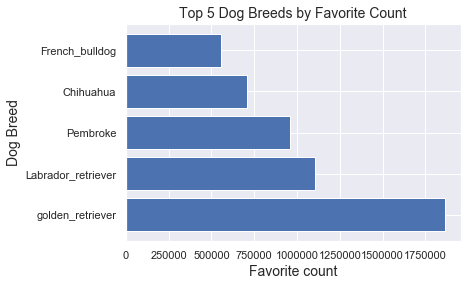

In [844]:
plt.barh(breed_fav_top5.best_guess_dog, breed_fav_top5.favorite_count)
plt.xlabel('Favorite count', fontsize = 14)
plt.ylabel('Dog Breed', fontsize = 14)
plt.title('Top 5 Dog Breeds by Favorite Count', fontsize = 14)
#plt.gca().invert_yaxis()
#plt.show();

**2. Which dog breed drove the most retweets?**
The answer is:
* golden_retriever	
* Labrador_retriever
* Pembroke
* Chihuahua
* Samoyed
These five breeds together made up for 37% of the total retweets.

In [872]:
breed_rt = twitter_archive_master_copy.groupby(['best_guess_dog']).agg(
    favorite_count = ('favorites', 'sum'),
    retweet_count = ('retweet','sum'),
    average_rating = ('rating_numerator', 'mean')
).reset_index().sort_values(('retweet_count'), ascending=False)

breed_rt['pct_of_total'] = breed_rt.retweet_count / breed_rt.retweet_count.sum()
breed_rt_top5 = breed_rt.head(5)
breed_rt_top5

,best_guess_dog,favorite_count,retweet_count,average_rating,pct_of_total
89,golden_retriever,1863051.0,536607.0,11.640625,0.129374
37,Labrador_retriever,1106968.0,340669.0,11.163462,0.082134
49,Pembroke,956989.0,253774.0,11.425532,0.061184
16,Chihuahua,707684.0,225839.0,10.533333,0.054449
55,Samoyed,509596.0,167134.0,11.731707,0.040296


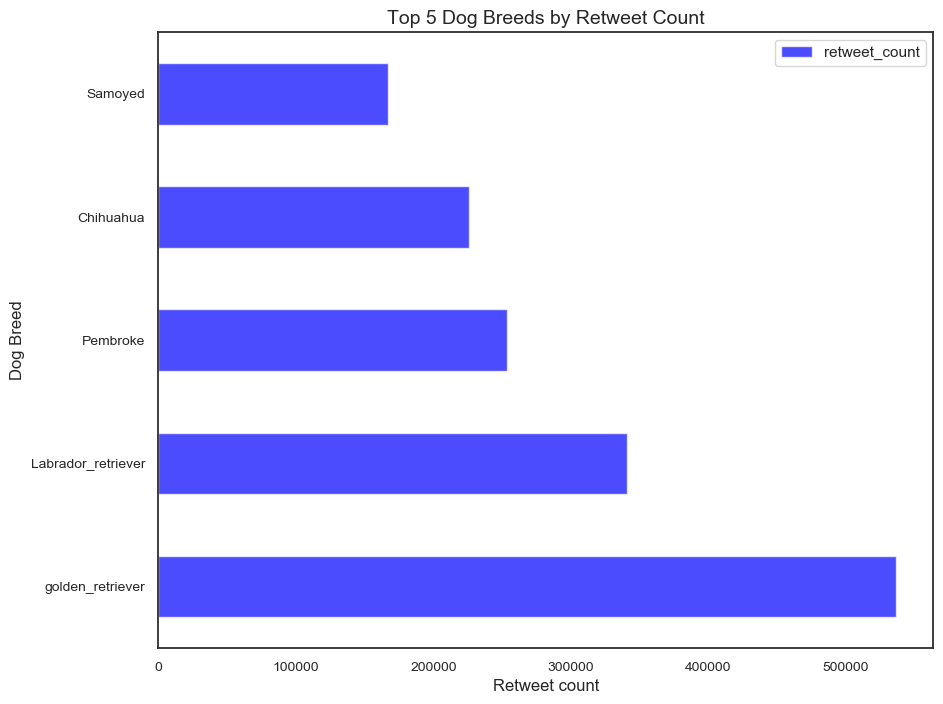

In [870]:
breed_rt_top5.plot(x = 'best_guess_dog',
                    y= 'retweet_count',
                    kind ='barh',
                    fontsize = 10,
                    color = 'blue',
                   alpha = 0.7,
                  figsize = (10,8))
plt.title('Top 5 Dog Breeds by Retweet Count', fontsize = 14)
plt.xlabel('Retweet count')
plt.ylabel('Dog Breed')
plt.legend()
#plt.show()

**3. Which dog breeds should WeRateDogs tweet more about if they want more favorites or retweets?**

To answer this question, I would like to calculate two ratios:
* favorite_tweet_ratio: The number of favorites a dog breed have generated divided by the number of WeRateDogs tweets about that dog breed
* retweet_tweet_ratio: The number of retweets a dog breed have generated divided by the number of WeRateDogs tweets about that dog breed

The answer is, WeRateDogs should tweet more about the following five dog breeds if they want more favorites.
* **Bedlington_terrier** (each WeRateDogs tweets generated 22832.33 favorites vs. overall 8571.45)
* **Saluki** (each WeRateDogs tweets generated 21940.25 favorites vs. overall 8571.45)
* **French_bulldog** (each WeRateDogs tweets generated 18527.10 favorites vs. overall 8571.45)
* **flat-coated_retriever** (each WeRateDogs tweets generated 18476.44 favorites vs. overall 8571.45)
* **Bouvier_des_Flandres** (each WeRateDogs tweets generated 16252.00 favorites vs. overall 8571.45)

If they want more retweets, they can tweet more about the following five dog breeds if they want more retweets.
* **Bedlington_terrier** (each WeRateDogs tweets generated 7193.00 retweets vs. overall 2485.14)
* **flat-coated_retriever** (each WeRateDogs tweets generated 5429.78 retweets vs. overall 2485.14)
* **Afghan_hound** (each WeRateDogs tweets generated 5122.00 retweets vs. overall 2485.14)
* **standard_poodle** (each WeRateDogs tweets generated 4786.00 retweets vs. overall 2485.14)
* **French_bulldog** (each WeRateDogs tweets generated 4723.80 retweets vs. overall 2485.14)

In [847]:
most_tweet_breed = twitter_archive_master_copy.groupby('best_guess_dog')['tweet_id'].count()
ratio_df = pd.merge(most_tweet_breed, breed_rt, how = 'left',\
                       left_on = ['best_guess_dog'],\
                       right_on = ['best_guess_dog'])

ratio_df.query('best_guess_dog == "golden_retriever"')
ratio_df['favorite_tweet_ratio'] = ratio_df['favorite_count']/ratio_df['tweet_id']
ratio_pivot = ratio_df.groupby(['best_guess_dog']).agg(
    favorite_count = ('favorite_count',sum),
    retweet_count = ('retweet_count',sum),
    tweet_count = ('tweet_id', sum))
ratio_pivot['favorite_tweet_ratio'] = ratio_pivot['favorite_count']/ratio_pivot['tweet_count']
ratio_pivot['retweet_tweet_ratio'] = ratio_pivot['retweet_count']/ratio_pivot['tweet_count']
ratio_pivot.sort_values(('favorite_tweet_ratio'), ascending = False).head(5)

,favorite_count,retweet_count,tweet_count,favorite_tweet_ratio,retweet_tweet_ratio
best_guess_dog,,,,,
Bedlington_terrier,136994.0,43158.0,6,22832.333333,7193.000000
Saluki,87761.0,17719.0,4,21940.250000,4429.750000
French_bulldog,555813.0,141714.0,30,18527.100000,4723.800000
flat-coated_retriever,166288.0,48868.0,9,18476.444444,5429.777778
Bouvier_des_Flandres,16252.0,3836.0,1,16252.000000,3836.000000


In [848]:
ratio_df['favorite_count'].sum()/ratio_df['tweet_id'].sum(),  ratio_df['retweet_count'].sum()/ratio_df['tweet_id'].sum()

(8571.44577591372, 2485.144997004194)

In [849]:
ratio_pivot.sort_values(('retweet_tweet_ratio'), ascending = False).head(5)

,favorite_count,retweet_count,tweet_count,favorite_tweet_ratio,retweet_tweet_ratio
best_guess_dog,,,,,
Bedlington_terrier,136994.0,43158.0,6,22832.333333,7193.000000
flat-coated_retriever,166288.0,48868.0,9,18476.444444,5429.777778
Afghan_hound,46716.0,15366.0,3,15572.000000,5122.000000
standard_poodle,138922.0,52646.0,11,12629.272727,4786.000000
French_bulldog,555813.0,141714.0,30,18527.100000,4723.800000


**4. What are the most popular dog names?**
* Cooper
* Charlie
* Tucker
* Lucy
* Oliver

In [850]:
twitter_archive_master_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1669 entries, 0 to 2097
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   tweet_id              1669 non-null   object             
 1   timestamp_x           1669 non-null   datetime64[ns, UTC]
 2   source                1669 non-null   object             
 3   text                  1669 non-null   object             
 4   expanded_urls         1669 non-null   object             
 5   rating_numerator      1669 non-null   float64            
 6   name                  1669 non-null   object             
 7   dog_stage_value_name  1669 non-null   object             
 8   favorites             1669 non-null   float64            
 9   retweet               1669 non-null   float64            
 10  jpg_url               1669 non-null   object             
 11  img_num               1669 non-null   float64            
 12  p1    

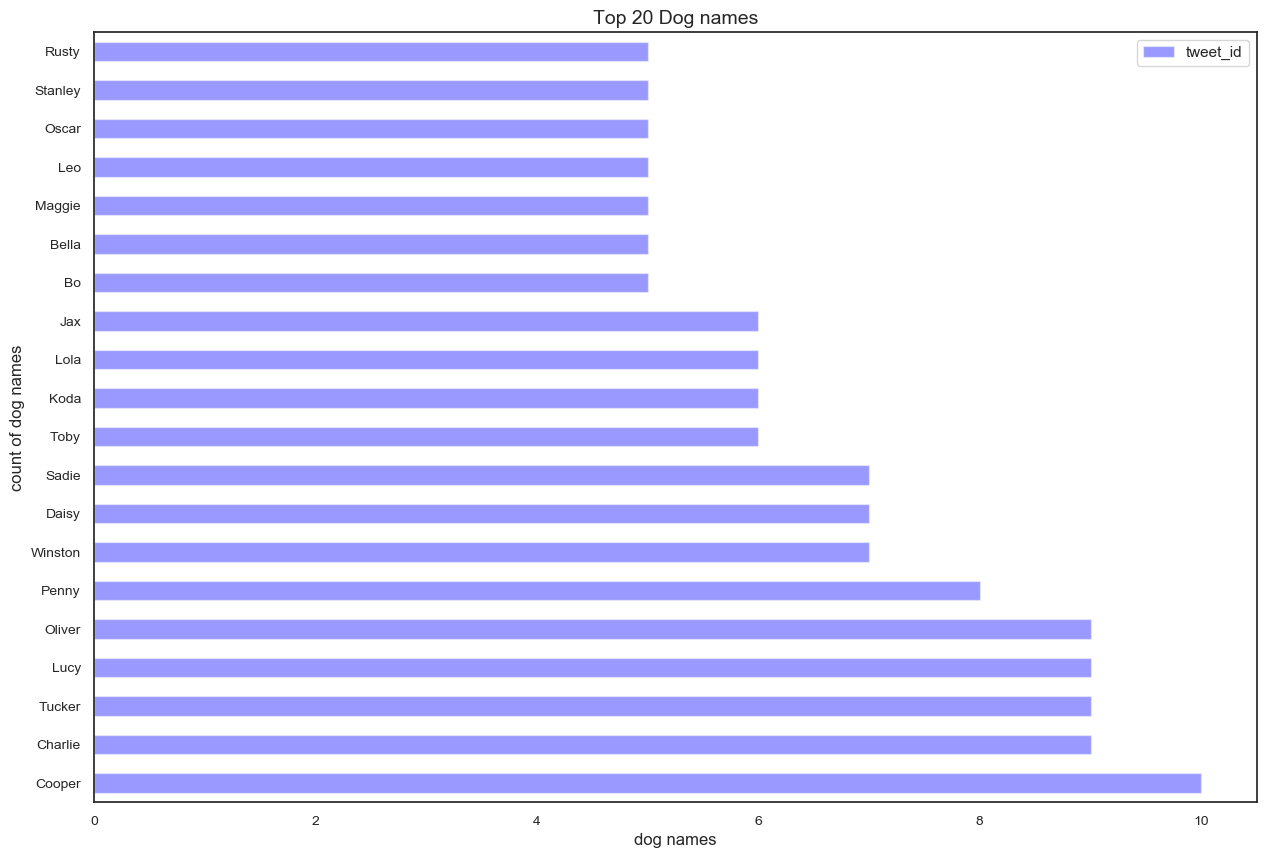

In [873]:
dog_names = twitter_archive_master_copy.query('name !="None"').groupby(['name'])['tweet_id'].count()
dog_name_plot = dog_names.sort_values(ascending=False).head(20)
dog_name_plot.plot(x = 'name',
                  y = 'tweet_id',
                  kind = 'barh',
                  fontsize = 10,
                   color = 'blue',
                   alpha = 0.4
                  )
plt.xlabel('dog names')
plt.ylabel('count of dog names')
plt.title('Top 20 Dog names', fontsize = 14)
plt.legend()
plt.show()

In [852]:
dog_name_plot

name
Cooper     10
Charlie    9 
Tucker     9 
Lucy       9 
Oliver     9 
Penny      8 
Winston    7 
Daisy      7 
Sadie      7 
Toby       6 
Koda       6 
Lola       6 
Jax        6 
Bo         5 
Bella      5 
Maggie     5 
Leo        5 
Oscar      5 
Stanley    5 
Rusty      5 
Name: tweet_id, dtype: int64

**5. Which dog stage receive the highest ratings?**

puppo receive the highest rating. 

Text(0.5, 1.0, 'Average rating by dog stage')

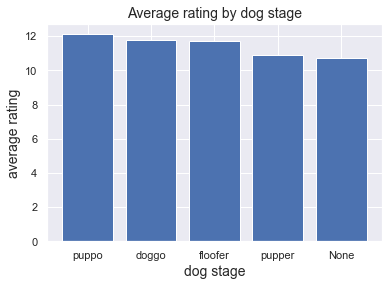

In [853]:
dog_stage_rating = twitter_archive_master_copy.groupby(['dog_stage_value_name']).mean()['rating_numerator'].reset_index().sort_values(by=['rating_numerator'],ascending=False)
plt.bar(dog_stage_rating['dog_stage_value_name'],dog_stage_rating['rating_numerator'])
plt.xlabel('dog stage', fontsize = 14)
plt.ylabel('average rating',fontsize = 14 )
plt.title('Average rating by dog stage', fontsize = 14)


**6. Over time, did the number of favorites and retweets for this account grow or drop?**

In [854]:
min_time = twitter_archive_master_copy['timestamp_x'].min()
twitter_archive_master_copy['days_count'] = twitter_archive_master_copy['timestamp_x'] - min_time
min_time

Timestamp('2015-11-15 22:32:08+0000', tz='UTC')

In [855]:
twitter_archive_master_copy['days_count'] = twitter_archive_master_copy['days_count'].astype(str).str.split('days', expand = True)[0].str.replace(' ','').astype(int)
twitter_archive_master_copy.sample(5)

,tweet_id,timestamp_x,source,text,expanded_urls,rating_numerator,name,dog_stage_value_name,favorites,retweet,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,best_guess_conf,best_guess_dog,days_count
1516,682259524040966145,2015-12-30 17:58:40+00:00,Twitter for iPhone,Meet Jax. He's an Iglesias Hufflepoof. Quite the jokester. Takes it too far sometimes. Can be very hurtful. 9/10 https://t.co/i5TeG0KYcW,https://twitter.com/dog_rates/status/682259524040966145/photo/1,9.0,Jax,None,4051.0,1169.0,https://pbs.twimg.com/media/CXffar9WYAArfpw.jpg,1.0,Siberian_husky,0.439670,True,Eskimo_dog,0.340474,True,malamute,0.101253,True,0.439670,Siberian_husky,44
706,815639385530101762,2017-01-01 19:22:38+00:00,Twitter for iPhone,This is Titan. His nose is quite chilly. Requests to return to the indoors. 12/10 would boop to warm https://t.co/bLZuOh9sKy,https://twitter.com/dog_rates/status/815639385530101762/photo/1,12.0,Titan,None,8249.0,1651.0,https://pbs.twimg.com/media/C1G7sXyWIAA10eH.jpg,1.0,German_shepherd,0.817953,True,Norwegian_elkhound,0.140007,True,malinois,0.024821,True,0.817953,German_shepherd,412
210,725786712245440512,2016-04-28 20:40:11+00:00,Twitter for iPhone,Say hello to Lillie. She's a Rutabagan Floofem. Poor pupper ate and then passed out. 11/10 relatable af https://t.co/uIdGqug9rw,https://twitter.com/dog_rates/status/725786712245440512/photo/1,11.0,Lillie,pupper,4089.0,1337.0,https://pbs.twimg.com/media/ChKDKmIWIAIJP_e.jpg,1.0,chow,0.335761,True,Samoyed,0.167173,True,kuvasz,0.145715,True,0.335761,chow,164
1861,670435821946826752,2015-11-28 02:55:30+00:00,Twitter for iPhone,Two unbelievably athletic dogs here. Great form. Perfect execution. 10/10 for both https://t.co/sQuKwSKtDE,https://twitter.com/dog_rates/status/670435821946826752/photo/1,10.0,None,None,1001.0,481.0,https://pbs.twimg.com/media/CU3d0azWUAA38FD.jpg,1.0,sorrel,0.460370,False,basenji,0.135767,True,Cardigan,0.099174,True,0.135767,basenji,12
1325,699423671849451520,2016-02-16 02:42:52+00:00,Twitter for iPhone,"""Don't ever talk to me or my son again."" ...both 10/10 https://t.co/b8ncwl6TlE",https://twitter.com/dog_rates/status/699423671849451520/photo/1,10.0,None,None,1337.0,318.0,https://pbs.twimg.com/media/CbTaHrRW0AABXmG.jpg,1.0,pug,0.997860,True,French_bulldog,0.001825,True,bull_mastiff,0.000299,True,0.997860,pug,92


In [856]:
twitter_archive_master_copy.describe()

,rating_numerator,favorites,retweet,img_num,p1_conf,p2_conf,p3_conf,best_guess_conf,days_count
count,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1669.000000,1.669000e+03,1669.000000,1669.000000
mean,10.825512,8571.445776,2485.144997,1.213901,0.605372,0.137488,6.141735e-02,0.551148,202.492510
std,1.776839,12554.722193,4498.344761,0.573515,0.266316,0.101420,5.197454e-02,0.298714,187.481879
min,0.000000,70.000000,11.000000,1.000000,0.044333,0.000010,2.160900e-07,0.000010,0.000000
25%,10.000000,1953.000000,556.000000,1.000000,0.378151,0.054855,1.596500e-02,0.306910,31.000000
50%,11.000000,4021.000000,1236.000000,1.000000,0.606654,0.121377,4.990060e-02,0.550702,133.000000
75%,12.000000,10608.000000,2804.000000,1.000000,0.852088,0.199396,9.475920e-02,0.822940,350.000000
max,14.000000,153928.000000,76273.000000,4.000000,0.999984,0.467678,2.734190e-01,0.999956,624.000000


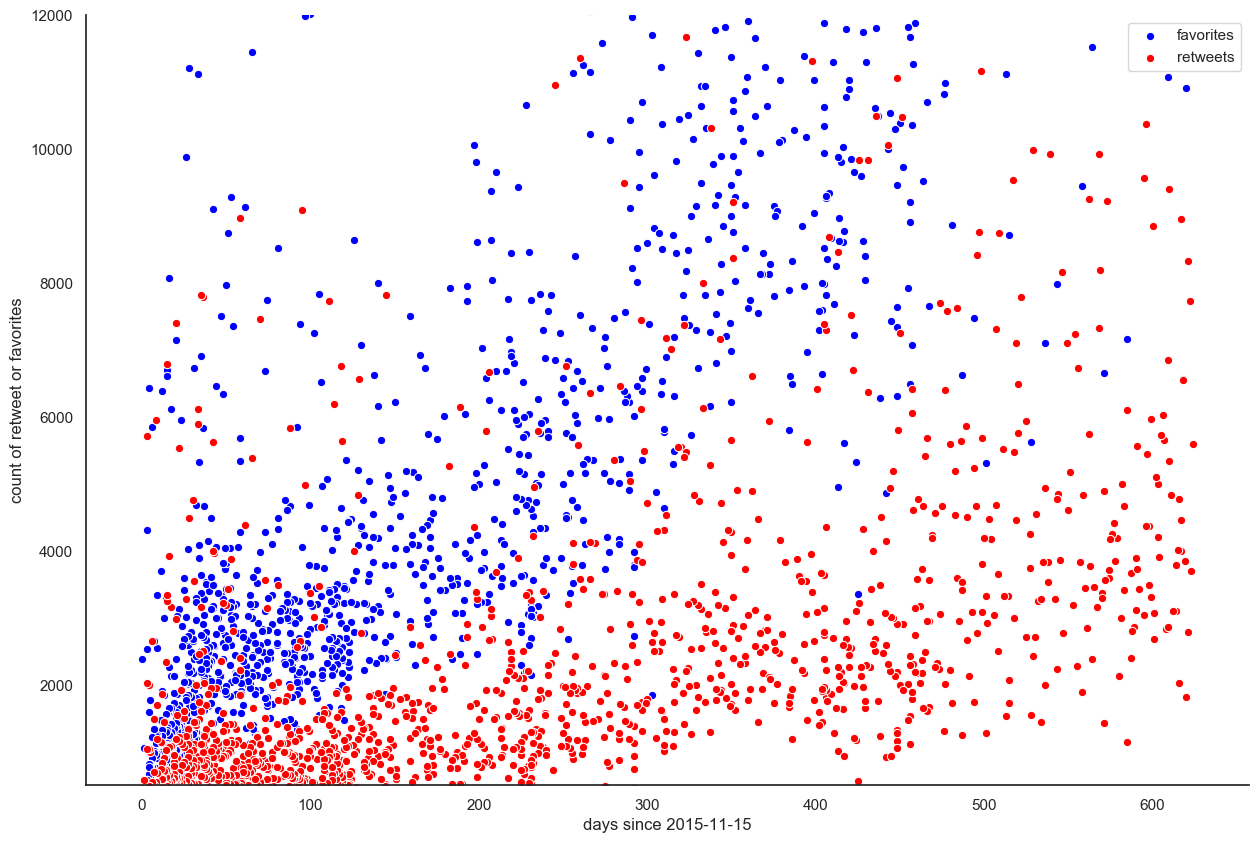

In [878]:
axes = plt.gca()
axes.set_ylim([500,12000])
sns.reset_defaults()
sns.set(
    rc={'figure.figsize':(15,10)}, 
    style="white" # nicer layout
)
sns.scatterplot(
    x=twitter_archive_master_copy['days_count'],
    y=twitter_archive_master_copy['favorites'],
#    hue=twitter_archive_master_copy['dog_stage_value_name']
    color = "blue"
)
sns.scatterplot(
    x=twitter_archive_master_copy['days_count'],
    y=twitter_archive_master_copy['retweet'],
#    hue=twitter_archive_master_copy['dog_stage_value_name']
    color = "red"
)
plt.xlabel('days since 2015-11-15')
plt.ylabel('count of retweet or favorites')
plt.legend(['favorites','retweets'])

sns.despine()

In [884]:
twitter_archive_master_copy.groupby(['tweet_id','text','best_guess_dog'])['favorites','retweet','rating_numerator'].sum().reset_index().sort_values(('favorites'), ascending=False)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,tweet_id,text,best_guess_dog,favorites,retweet,rating_numerator
978,744234799360020481,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,Labrador_retriever,153928.0,76273.0,13.0
1386,822872901745569793,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,Lakeland_terrier,131316.0,42973.0,13.0
1302,807106840509214720,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,Chihuahua,118868.0,55594.0,13.0
1558,866450705531457537,"This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr",French_bulldog,114984.0,32390.0,13.0
950,739238157791694849,Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC,Eskimo_dog,113819.0,56714.0,13.0
...,...,...,...,...,...,...
12,666082916733198337,Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof https://t.co/3RU6x0vHB7,pug,102.0,41.0,6.0
23,666407126856765440,This is a southern Vesuvius bumblegruff. Can drive a truck (wow). Made friends with 5 other nifty dogs (neat). 7/10 https://t.co/LopTBkKa8h,black-and-tan_coonhound,98.0,31.0,7.0
4,666049248165822465,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,miniature_pinscher,96.0,40.0,5.0
30,666447344410484738,This is Scout. She is a black Downton Abbey. Isn't afraid to get dirty. 9/10 nothing bad to say https://t.co/kH60oka1HW,curly-coated_retriever,96.0,18.0,9.0
